
## Assignmnet 6: Regression for Numeric Data

### Author: Mahlet Melese
### Date: July 2, 2023

## 1. Introduction


- The primary objective of this project is to perform regression analysis on numerical data.
- The dataset comprised of information pertaining to
NY State High School graduation metrics for the 2018-2019 school year (https://data.nysed.gov/downloads.php)

## 2. Exploratory Data Analysis 

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#### Read dataset from my github  repo and creat pandas dataframe

In [2]:
# Downloading the csv file from my GitHub repo
data_url = "https://raw.githubusercontent.com/mahletbirku/-DAV-6150/main/Project1_Data.csv" 
df = pd.read_csv(data_url, header=0)
df

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,6%,10,3%,18,5%,0,0%,91,25%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73147,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
73148,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
73149,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
73150,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-


**- This is the first 10 rows of the dataset using the head method. Here, we can have a first look at the features like columns and some of the values that each one takes.There are 73152 observations.**

#### Check the dataset shape

In [3]:
# check the result
df.shape

(73152, 29)

#### Let's get some of the basic statistics of the wine data.

- From the table above, for each feature we can get the mean, standard deviation, count, and other basic information that can tell about the data.

In [4]:
df.describe()

,aggregation_index,nrc_code,county_code,nyc_ind,subgroup_code
count,73152.0,73152.000000,73152.000000,73152.000000,73152.000000
mean,3.0,4.588583,36.251859,0.055255,12.000930
std,0.0,1.203507,20.588044,0.228479,7.213138
min,3.0,1.000000,1.000000,0.000000,1.000000
25%,3.0,4.000000,17.000000,0.000000,6.000000
50%,3.0,5.000000,40.000000,0.000000,11.000000
75%,3.0,5.000000,57.000000,0.000000,18.000000
max,3.0,6.000000,68.000000,1.000000,25.000000


#### Data types of all columns
- Pandas.dtypes function helps us to display the data types of all columns as a series.


In [5]:
# Check the data types

df.dtypes

report_school_year            object
aggregation_index              int64
aggregation_type              object
aggregation_name              object
nrc_code                       int64
nrc_desc                      object
county_code                    int64
county_name                   object
nyc_ind                        int64
membership_desc               object
subgroup_code                  int64
subgroup_name                 object
enroll_cnt                    object
grad_cnt                      object
grad_pct                      object
local_cnt                     object
local_pct                     object
reg_cnt                       object
reg_pct                       object
reg_adv_cnt                   object
reg_adv_pct                   object
non_diploma_credential_cnt    object
non_diploma_credential_pct    object
still_enr_cnt                 object
still_enr_pct                 object
ged_cnt                       object
ged_pct                       object
d

## 3-4. Data Preparation and Prepped Data Review

### Data integrity issues


##### Check null values

- I checked null values which is a fundamental part of data cleaning. I will use Pandas. isnull() and .sum() functions together to display count of missing values of each attribute.



In [6]:
print (df.isnull().sum())

report_school_year            0
aggregation_index             0
aggregation_type              0
aggregation_name              0
nrc_code                      0
nrc_desc                      0
county_code                   0
county_name                   0
nyc_ind                       0
membership_desc               0
subgroup_code                 0
subgroup_name                 0
enroll_cnt                    0
grad_cnt                      0
grad_pct                      0
local_cnt                     0
local_pct                     0
reg_cnt                       0
reg_pct                       0
reg_adv_cnt                   0
reg_adv_pct                   0
non_diploma_credential_cnt    0
non_diploma_credential_pct    0
still_enr_cnt                 0
still_enr_pct                 0
ged_cnt                       0
ged_pct                       0
dropout_cnt                   0
dropout_pct                   0
dtype: int64


### Create a new DF

- Here, I selected features manually that deterimns the target variable 'dropout_cnt'. The chosen variables are

In [7]:
new_df = df[['nrc_code','county_code','subgroup_code','enroll_cnt','grad_cnt', 'local_cnt','reg_cnt','reg_adv_cnt', 'still_enr_cnt', 'dropout_cnt']].copy()

new_df

,nrc_code,county_code,subgroup_code,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,still_enr_cnt,dropout_cnt
0,3,1,1,658,464,63,310,91,30,148
1,3,1,2,324,246,30,169,47,11,65
2,3,1,3,334,218,33,141,44,19,83
3,3,1,4,-,-,-,-,-,-,-
4,3,1,5,367,248,42,183,23,18,91
...,...,...,...,...,...,...,...,...,...,...
73147,4,68,18,-,-,-,-,-,-,-
73148,4,68,20,-,-,-,-,-,-,-
73149,4,68,21,-,-,-,-,-,-,-
73150,4,68,23,-,-,-,-,-,-,-


- Convert non-values into NaN so as to remove rows with those values.

In [8]:
new_df = new_df.apply (pd.to_numeric, errors='coerce')
new_df

,nrc_code,county_code,subgroup_code,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,still_enr_cnt,dropout_cnt
0,3,1,1,658.0,464.0,63.0,310.0,91.0,30.0,148.0
1,3,1,2,324.0,246.0,30.0,169.0,47.0,11.0,65.0
2,3,1,3,334.0,218.0,33.0,141.0,44.0,19.0,83.0
3,3,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,1,5,367.0,248.0,42.0,183.0,23.0,18.0,91.0
...,...,...,...,...,...,...,...,...,...,...
73147,4,68,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73148,4,68,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73149,4,68,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73150,4,68,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
new_df = new_df.dropna()
new_df

,nrc_code,county_code,subgroup_code,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,still_enr_cnt,dropout_cnt
0,3,1,1,658.0,464.0,63.0,310.0,91.0,30.0,148.0
1,3,1,2,324.0,246.0,30.0,169.0,47.0,11.0,65.0
2,3,1,3,334.0,218.0,33.0,141.0,44.0,19.0,83.0
4,3,1,5,367.0,248.0,42.0,183.0,23.0,18.0,91.0
5,3,1,6,98.0,58.0,13.0,40.0,5.0,8.0,28.0
...,...,...,...,...,...,...,...,...,...,...
73138,4,68,3,36.0,25.0,2.0,20.0,3.0,1.0,9.0
73142,4,68,10,48.0,43.0,3.0,32.0,8.0,0.0,5.0
73143,4,68,11,13.0,2.0,0.0,2.0,0.0,2.0,6.0
73145,4,68,15,33.0,23.0,0.0,20.0,3.0,0.0,7.0


- Now we have 39674 observation with 'dropout_cnt' value.

### Visualization

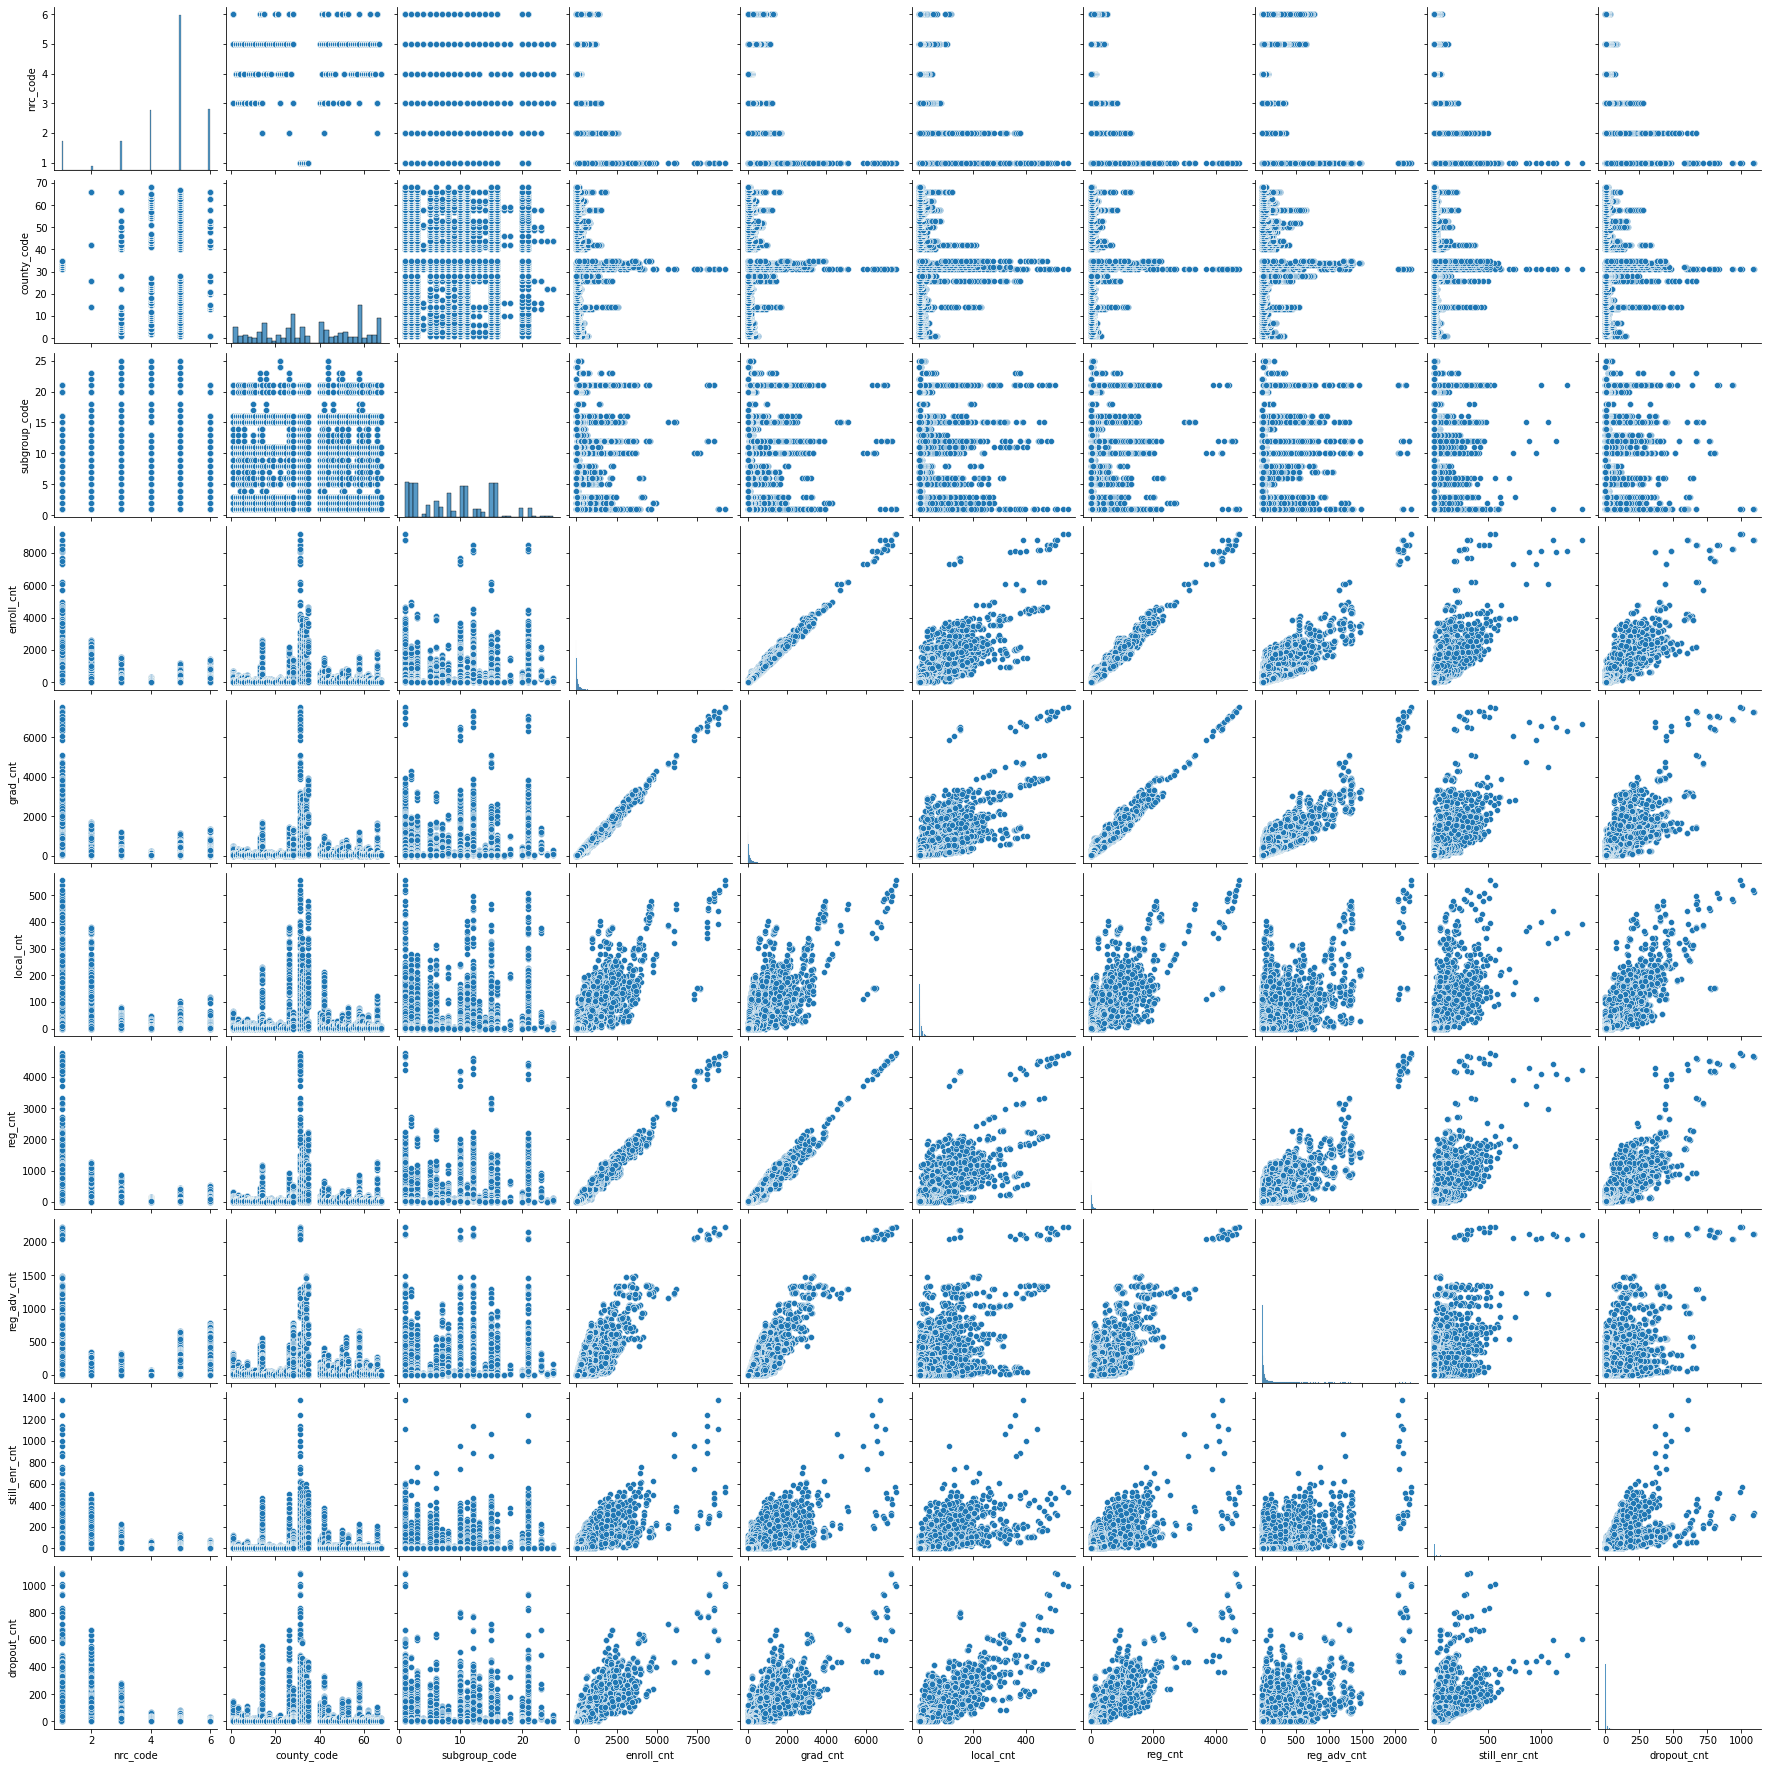

In [10]:
import seaborn as sns

sns.pairplot(new_df)

- From here, we can see the relationship between variables with the dependent variable- 'dropout_cnt'.

# 5. Regression Model Construction & Evaluation 

### Linear Regression

#### Build Model 1

- Here, I used 5 fold cross validation, where the first fold is treated as a test set, and the model is fit on the remaining k − 1 folds.

- Here, the cross_val_score from sklearn calculates the R squared metric for the applied model. R squared error close to 1 implies a better fit and less error.

- Here, for the regression analysis, I used these independent variables 'subgroup_code','enroll_cnt','grad_cnt', 'local_cnt','reg_cnt','reg_adv_cnt', 'still_enr_cnt'.

In [11]:
x =new_df[['subgroup_code','enroll_cnt','grad_cnt', 'local_cnt','reg_cnt','reg_adv_cnt', 'still_enr_cnt']]
y = new_df['dropout_cnt']

In [12]:
model_1 = LinearRegression()
average_score=np.mean(cross_val_score(model_1, x, y, cv=5))
average_score

0.9817120663002656

#### Build Model 2

- Here, I used 5 fold cross validation, where the first fold is treated as a test set, and the model is fit on the remaining k − 1 folds.

- Here, the cross_val_score from sklearn calculates the R squared metric for the applied model. R squared error close to 1 implies a better fit and less error.

- Here, for the regression analysis, I used these independent variables 'subgroup_code','enroll_cnt','grad_cnt', 'local_cnt','reg_cnt','reg_adv_cnt'.

In [13]:
x =new_df[['subgroup_code','enroll_cnt','grad_cnt', 'local_cnt','reg_cnt','reg_adv_cnt']]
y = new_df['dropout_cnt']

In [14]:
model_1 = LinearRegression()
average_score=np.mean(cross_val_score(model_1, x, y, cv=5))
average_score

0.8304355487385578

**Conclusion, I did two multi variable linear regression models and evaluted each model using an R^2 metrics.The highest R^2 value is 0.98**

### Poisson regression model

- Here, we are assuming a count data. For this, I used two independent variabes with the count data which is 'dropout_cnt'

In [136]:
from sklearn.linear_model import PoissonRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split


#### Model 1

In [137]:
p_df =new_df[['nrc_code', 'dropout_cnt']]
p_df

,nrc_code,dropout_cnt
0,3,148.0
1,3,65.0
2,3,83.0
4,3,91.0
5,3,28.0
...,...,...
73138,4,9.0
73142,4,5.0
73143,4,6.0
73145,4,7.0


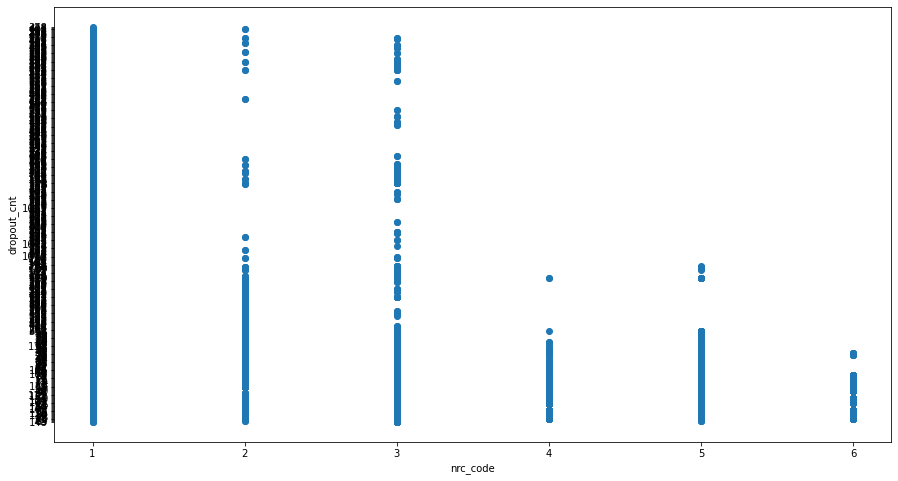

In [138]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_ylabel("dropout_cnt")                                
ax.set_xlabel("nrc_code")
ax.scatter( df['nrc_code'],df['dropout_cnt'])
plt.show()



- cross validation

In [140]:
train,test=train_test_split(p_df, train_size = .8,random_state =1)

In [141]:
x_train=train['nrc_code'].values.reshape(-1, 1)
x_test=test['nrc_code'].values.reshape(-1, 1)
y_train=train['dropout_cnt']
y_test=test['dropout_cnt']

- Model training

In [142]:
import statsmodels.api as sm
# Fit the Poisson regression model
poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()
# Print the summary of the model
print(poisson_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                31739
Model:                            GLM   Df Residuals:                    31738
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.5250e+06
Date:                Wed, 05 Jul 2023   Deviance:                   2.9580e+06
Time:                        14:35:58   Pearson chi2:                 5.08e+07
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4198      0.000   1036.467      0.0

In [143]:
# Predict on the test dataset
y_pred = poisson_model.predict(x_test)
score = metrics.r2_score(y_test, y_pred)
score

-0.08763697123053449

In [144]:
model = Pipeline([('model', PoissonRegressor())])
model.fit(x_train, y_train)
pred = model.predict(x_test)
score = metrics.r2_score(y_test, pred)
score

0.3073467938012412

#### Model 2

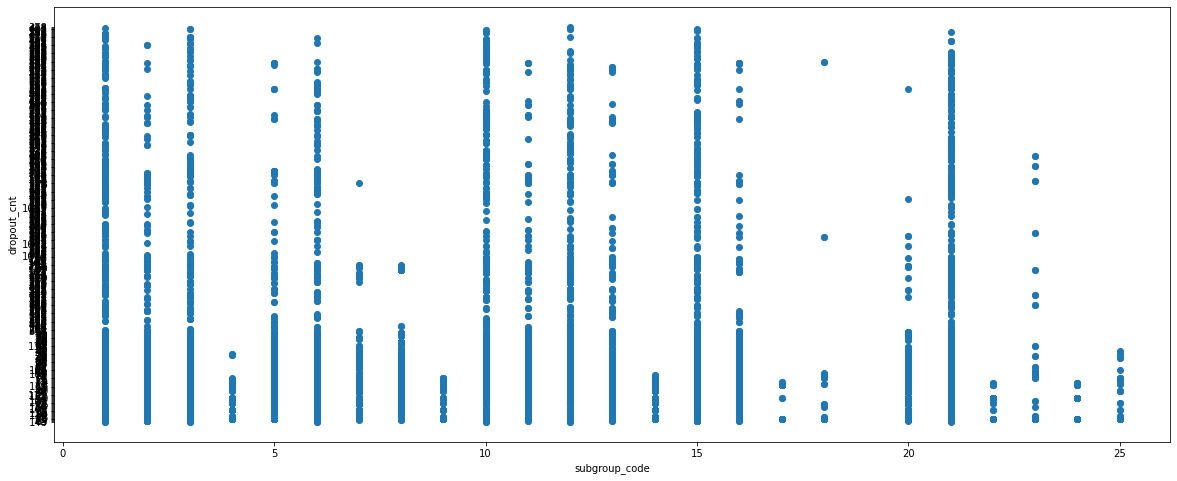

In [145]:
p_df =new_df[['subgroup_code', 'dropout_cnt']]
#plot
fig, ax = plt.subplots(figsize=(20,8))
ax.set_ylabel("dropout_cnt")                                
ax.set_xlabel("subgroup_code")
ax.scatter( df['subgroup_code'],df['dropout_cnt'])
plt.show()

In [146]:
train,test=train_test_split(p_df, train_size = .8,random_state =1)

In [147]:
x_train=train['subgroup_code'].values.reshape(-1, 1)
x_test=test['subgroup_code'].values.reshape(-1, 1)
y_train=train['dropout_cnt']
y_test=test['dropout_cnt']

- Model training

In [148]:
import statsmodels.api as sm
# Fit the Poisson regression model
poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()
# Print the summary of the model
print(poisson_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                31739
Model:                            GLM   Df Residuals:                    31738
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1579e+06
Date:                Wed, 05 Jul 2023   Deviance:                   2.2237e+06
Time:                        14:36:17   Pearson chi2:                 2.75e+07
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1939      0.000   1756.712      0.0

In [149]:
# Predict on the test dataset
y_pred = poisson_model.predict(x_test)
score = metrics.r2_score(y_test, y_pred)
score

-0.0309359450595299

In [113]:
model = Pipeline([('model', PoissonRegressor())])
model.fit(x_train, y_train)
pred = model.predict(x_test)
score = metrics.r2_score(y_test, pred)
score


0.003126848617958311

**Based on the information provided, I conducted two Poisson regression analyses utilizing distinct independent variables. I employed R^2 as an evaluation metric for both models. However, the outcomes yielded negative values, indicating that the data does not fully adhere to a Poisson distribution.**

### Negative Binomial regression model

#### Model 1

In [115]:
nb_df =new_df[['nrc_code', 'dropout_cnt']]
nb_df

,nrc_code,dropout_cnt
0,3,148.0
1,3,65.0
2,3,83.0
4,3,91.0
5,3,28.0
...,...,...
73138,4,9.0
73142,4,5.0
73143,4,6.0
73145,4,7.0


- Cross validation

In [117]:
train,test=train_test_split(nb_df, train_size = .8,random_state =1)
x_train=train['nrc_code'].values.reshape(-1, 1)
x_test=test['nrc_code'].values.reshape(-1, 1)
y_train=train['dropout_cnt']
y_test=test['dropout_cnt']

- Model training

In [119]:
import statsmodels.api as sm
# Fit the Poisson regression model
nb_model = sm.GLM(y_train, x_train, family=sm.families.NegativeBinomial()).fit()
# Print the summary of the model
print(nb_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                31739
Model:                            GLM   Df Residuals:                    31738
Model Family:        NegativeBinomial   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.3444e+05
Date:                Wed, 05 Jul 2023   Deviance:                   3.2305e+05
Time:                        14:25:43   Pearson chi2:                 1.00e+07
No. Iterations:                    36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7727      0.001    633.708      0.0

In [120]:
# Predict on the test dataset
y_pred = nb_model.predict(x_test)
score = metrics.r2_score(y_test, y_pred)
score

-1.168924865736725

#### Model 2

In [121]:
nb_df =new_df[['subgroup_code', 'dropout_cnt']]
nb_df

,subgroup_code,dropout_cnt
0,1,148.0
1,2,65.0
2,3,83.0
4,5,91.0
5,6,28.0
...,...,...
73138,3,9.0
73142,10,5.0
73143,11,6.0
73145,15,7.0


In [122]:
train,test=train_test_split(nb_df, train_size = .8,random_state =1)
x_train=train['subgroup_code'].values.reshape(-1, 1)
x_test=test['subgroup_code'].values.reshape(-1, 1)
y_train=train['dropout_cnt']
y_test=test['dropout_cnt']

- Model training

In [123]:
import statsmodels.api as sm
# Fit the Poisson regression model
nb_model = sm.GLM(y_train, x_train, family=sm.families.NegativeBinomial()).fit()
# Print the summary of the model
print(nb_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                31739
Model:                            GLM   Df Residuals:                    31738
Model Family:        NegativeBinomial   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.7962e+05
Date:                Wed, 05 Jul 2023   Deviance:                   2.1341e+05
Time:                        14:28:15   Pearson chi2:                 8.21e+06
No. Iterations:                    13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2728      0.001    504.672      0.0

In [124]:
# Predict on the test dataset
y_pred = nb_model.predict(x_test)
score = metrics.r2_score(y_test, y_pred)
score

-1.7403626827576

- Based on the information provided, I conducted two Negative Binomial regression analyses utilizing distinct independent variables. I employed R^2 as an evaluation metric for both models. However, the outcomes yielded negative values, indicating that the data does not fully adhere to a Negative binomial distribution.


## 7. Conclusions

To summarize, within this project, I conducted an analysis on a publicly available dataset employing various regression models including linear, Poisson, and negative binomial models. The evaluation of these models was performed using R^2 as the assessment metric. Out of all the models, multi variable linear regression perfomed the best by having the hightest R^2 value.